In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
#function for turning the label into
#a variable that categorizes whether an image
#is a letter or not
def letter_or_not(x):
    if x == 'sad' or x == 'smiley' or x == 'xclaim':
        return 0
    else:
        return 1

In [3]:
df = pd.read_csv('40431475_features.csv')
df['label'] = df['label'].apply(letter_or_not)

#Splits data 80/20 into training and testing data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = df[:112]
test_data = df[112:]

In [4]:
#fit a model based of the training data
x_training = train_data[['nr_pix','aspect_ratio']]
y_training = train_data['label']
model = LogisticRegression()
model.fit(x_training,y_training)

#Test the model on the testing data
x_testing = test_data[['nr_pix','aspect_ratio']]
y_testing = test_data['label']
test_predicts = (model.predict_proba(x_testing)[:, 1] > 0.5).astype(int)
test_accuracy = accuracy_score(y_testing, test_predicts)
conf_mat = confusion_matrix(y_testing,test_predicts)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_mat)
print("True positive rate:", conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]))
print("False positive rate:", conf_mat[0,1]/(conf_mat[0,1]+conf_mat[0,0]))
print("Precision:", precision_score(y_testing,test_predicts))
print("Recall:", recall_score(y_testing,test_predicts))
print("F1 score:", f1_score(y_testing,test_predicts))

Testing Accuracy: 0.7857142857142857
Confusion Matrix:
 [[10  3]
 [ 3 12]]
True positive rate: 0.8
False positive rate: 0.23076923076923078
Precision: 0.8
Recall: 0.8
F1 score: 0.8


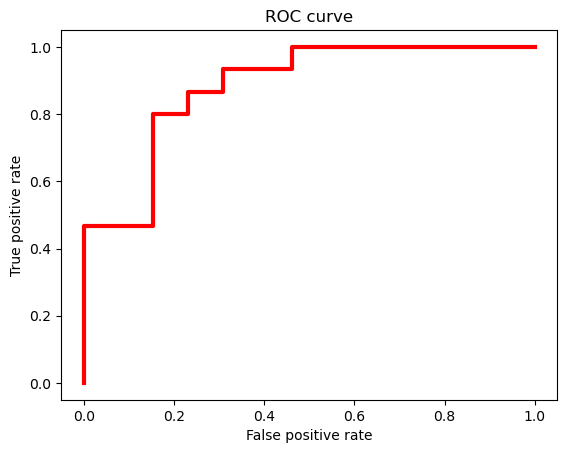

0.882051282051282


In [5]:
#ROC Curve
probs = model.predict_proba(x_testing)[:, 1]
fpr, tpr, thresholds = roc_curve(y_testing, probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=3, label="ROC Curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print(roc_auc)

In [6]:
#set up folds
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

In [7]:
#These variables store the results across crossvalidation
#So we can fetch our average results or best model later
acc_scores = []
tp_scores = []
fp_scores = []
prec_scores = []
rec_scores = []
f1_scores = []
best_model = LogisticRegression()
best_acc = 0
x_final = []
y_final = []
best_roc_auc = 0



The following code contains both versions of the crossvalidation for my research. Despite the code repetition, I have included them both here to align with the original code in my report.

In [9]:
#This version determines the best model by finding the best accuracy
#It iterates through all of the folds, adding their statistics to an array before calculating
#the cross validated average
for train_idx, test_idx in kf.split(df):
    train_data = df.iloc[train_idx]
    test_data = df.iloc[test_idx]

    x_train = train_data[['nr_pix','aspect_ratio']]
    y_train = train_data['label']
    x_test = test_data[['nr_pix', 'aspect_ratio']]
    y_test = test_data['label']

    model = LogisticRegression()
    model.fit(x_train, y_train)
    test_predicts = (model.predict_proba(x_test)[:, 1] > 0.5).astype(int)

    acc = model.score(x_test,y_test)
    acc_scores.append(acc)
    print("Fold accuracy:", acc)

    conf_mat = confusion_matrix(y_test, test_predicts)
    tp_scores.append(conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]))
    fp_scores.append(conf_mat[0,1]/(conf_mat[0,1]+conf_mat[0,0]))

    prec_scores.append(precision_score(y_test, test_predicts))
    rec_scores.append(recall_score(y_test,test_predicts))
    f1_scores.append(f1_score(y_test,test_predicts))

    test_probs = (model.predict_proba(x_test)[:,1])
    c_fpr, c_tpr, c_thresholds =roc_curve(y_test, test_probs)
    c_roc_auc = auc(c_fpr, c_tpr)
    print("Area under curve: ", c_roc_auc)

    if acc > best_acc:
        best_model = model
        best_acc = acc
        x_final = x_test
        y_final = y_test

Fold accuracy: 0.8214285714285714
Area under curve:  0.9132653061224489
Fold accuracy: 0.8571428571428571
Area under curve:  0.8072916666666667
Fold accuracy: 0.8214285714285714
Area under curve:  0.9375
Fold accuracy: 0.75
Area under curve:  0.8615384615384616
Fold accuracy: 0.8214285714285714
Area under curve:  0.9282051282051282


In [10]:
#This version determines the best model by finding the best area under the curve
#It iterates through all of the folds, adding their statistics to an array before calculating
#the cross validated average
for train_idx, test_idx in kf.split(df):
    train_data = df.iloc[train_idx]
    test_data = df.iloc[test_idx]

    x_train = train_data[['nr_pix','aspect_ratio']]
    y_train = train_data['label']
    x_test = test_data[['nr_pix', 'aspect_ratio']]
    y_test = test_data['label']

    model = LogisticRegression()
    model.fit(x_train, y_train)
    test_predicts = (model.predict_proba(x_test)[:, 1] > 0.5).astype(int)

    acc = model.score(x_test,y_test)
    acc_scores.append(acc)
    print("Fold accuracy:", acc)

    conf_mat = confusion_matrix(y_test, test_predicts)
    tp_scores.append(conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]))
    fp_scores.append(conf_mat[0,1]/(conf_mat[0,1]+conf_mat[0,0]))

    prec_scores.append(precision_score(y_test, test_predicts))
    rec_scores.append(recall_score(y_test,test_predicts))
    f1_scores.append(f1_score(y_test,test_predicts))

    test_probs = (model.predict_proba(x_test)[:,1])
    c_fpr, c_tpr, c_thresholds =roc_curve(y_test, test_probs)
    c_roc_auc = auc(c_fpr, c_tpr)
    print("Area under curve: ", c_roc_auc)

    if c_roc_auc > best_roc_auc:
        best_model = model
        best_roc_auc = c_roc_auc
        x_final = x_test
        y_final = y_test

Fold accuracy: 0.8214285714285714
Area under curve:  0.9132653061224489
Fold accuracy: 0.8571428571428571
Area under curve:  0.8072916666666667
Fold accuracy: 0.8214285714285714
Area under curve:  0.9375
Fold accuracy: 0.75
Area under curve:  0.8615384615384616
Fold accuracy: 0.8214285714285714
Area under curve:  0.9282051282051282


In [11]:
avg_acc = np.mean(acc_scores)
avg_tpr = np.mean(tp_scores)
avg_fpr = np.mean(fp_scores)
avg_prec = np.mean(prec_scores)
avg_recall = np.mean(rec_scores)
avg_f1 = np.mean(f1_scores)

print("Average cross-validated accuracy:", avg_acc)
print("Average true positive rate:", avg_tpr)
print("Average false positive rate:", avg_fpr)
print("Average precision:", avg_prec)
print("Average recall:", avg_recall)
print("Average f1:", avg_f1)

Average cross-validated accuracy: 0.8142857142857143
Average true positive rate: 0.8432142857142857
Average false positive rate: 0.19945054945054946
Average precision: 0.8410364145658263
Average recall: 0.8432142857142857
Average f1: 0.8359970462044662


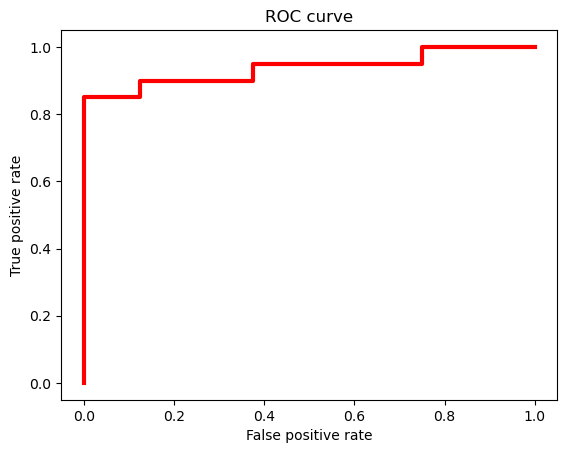

AUC =  0.9375


In [12]:
#ROC Curve
final_predicts = best_model.predict_proba(x_final)[:, 1]
fpr, tpr, thresholds = roc_curve(y_final,final_predicts)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=3, label="ROC Curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print("AUC = ",roc_auc)